In [368]:
import pandas as pd
import numpy as np
import seaborn as sns
import connectheroku
import matplotlib.pyplot as plt

In [369]:
def make_query(query_string, cursorobject):
    cursorobject.execute(query_string)
    results = cursorobject.fetchall()
    column_names = [i[0] for i in cursorobject.description]
    cursorobject.close()
    df = pd.DataFrame(results, columns=column_names)
    return df

In [370]:
credential_file = '/Users/aliglara/Documents/MyGit/apis/credential_keys.json'

In [371]:
cursor = connectheroku.connect_database("c1_capstone", credential_file)

In [372]:
list_states = ['NY', 'OR', 'CA', 'WA', 'MA', 'CO', 'FL', 'AZ', 'PA', 'GA']

# Analizing the number of renter housing units by educational attainment level

The data was taken from the census.gov and it refers to the number of housing units available for rent, and the amount of occupied by people based on their educational level.

Therefore, the total of units by state represents the total number of renter housing units occupied by people based on their instructional level.

In [373]:
query = ("SELECT "
         "uspop.year, "
         "uspop.name_state, "
         "uspop.total_renter_occupied_units_educ_attainment, "
         "uspop.renter_occupied_units_high_school_graduate, "
         "uspop.renter_occupied_units_some_college_degree, "
         "uspop.renter_occupied_units_bachelor_degree_or_higher "
         " FROM us_population AS uspop"
         " WHERE uspop.id_state IN (SELECT sr.state FROM state_region AS sr "
         " WHERE sr.abbreviation IN ('" + "', '".join(list_states) + "') "
         ")")

In [374]:
renter_occupied_df = make_query(query, cursor)

In [375]:
renter_occupied_df

,year,name_state,total_renter_occupied_units_educ_attainment,renter_occupied_units_high_school_graduate,renter_occupied_units_some_college_degree,renter_occupied_units_bachelor_degree_or_higher
0,2015,New York,3394792,844820,845166,1100677
1,2015,Oregon,604314,134547,240163,161900
2,2015,Pennsylvania,1550281,528833,428517,383053
3,2015,Washington,1025304,230928,383616,302918
4,2015,Arizona,938180,219578,364196,210093
5,2015,California,5985534,1200022,1893017,1744084
6,2015,Colorado,752117,159916,272185,237783
7,2015,Florida,2703113,746895,905205,676010
8,2015,Georgia,1395241,381047,462321,326843
9,2015,Massachusetts,979998,256051,256315,324354


In [376]:
renter_occupied_df.rename(
    {'year': 'Year', 
     'name_state': 'State name', 
     'total_renter_occupied_units_educ_attainment': 'Total occupied units',
     'renter_occupied_units_high_school_graduate': 'HS graduate', # High School graduate
     'renter_occupied_units_some_college_degree' :'College degree',
     'renter_occupied_units_bachelor_degree_or_higher' : 'Bachelor degree or higher'}, axis='columns', inplace=True)

In [377]:
renter_occupied_df

,Year,State name,Total occupied units,HS graduate,College degree,Bachelor degree or higher
0,2015,New York,3394792,844820,845166,1100677
1,2015,Oregon,604314,134547,240163,161900
2,2015,Pennsylvania,1550281,528833,428517,383053
3,2015,Washington,1025304,230928,383616,302918
4,2015,Arizona,938180,219578,364196,210093
5,2015,California,5985534,1200022,1893017,1744084
6,2015,Colorado,752117,159916,272185,237783
7,2015,Florida,2703113,746895,905205,676010
8,2015,Georgia,1395241,381047,462321,326843
9,2015,Massachusetts,979998,256051,256315,324354


## Calculating the percentage of the units occupied by Bachelors or above. 

In [378]:
renter_occupied_df["Perc bachelor or higher"] = renter_occupied_df["Bachelor degree or higher"] / renter_occupied_df["Total occupied units"] * 100

In [379]:
renter_occupied_df.set_index(["Year", "State name"], inplace=True)

In [380]:
renter_occupied_df

Total occupied units  HS graduate  College degree  \
Year State name                                                         
2015 New York                    3394792       844820          845166   
     Oregon                       604314       134547          240163   
     Pennsylvania                1550281       528833          428517   
     Washington                  1025304       230928          383616   
     Arizona                      938180       219578          364196   
     California                  5985534      1200022         1893017   
     Colorado                     752117       159916          272185   
     Florida                     2703113       746895          905205   
     Georgia                     1395241       381047          462321   
     Massachusetts                979998       256051          256315   
2016 New York                    3367884       842587          832435   
     Oregon                       602099       134741          232715   
     Pennsylvania                1555257       527975          427384   
     Washington                  1038756       228848          382716   
     Arizona                      926038       218938          355514   
     California                  6000750      1172516         1895661   
     Colorado                     743160       169862          264391   
     Florida                     2716331       756690          897648   
     Georgia                     1417529       374613          460669   
     Massachusetts                980468       255927          247469   
2017 New York                    3374299       868719          822243   
     Oregon                       596620       138924          227762   
     Pennsylvania                1587734       568794          418801   
     Washington                  1056828       234076          393582   
     Arizona                      900651       217557          343966   
     California                  5880007      1167700         1835573   
     Colorado                     744383       162841          262026   
     Florida                     2679777       758775          893171   
     Georgia                     1390152       394684          444283   
     Massachusetts                981439       267497          244481   
2018 New York                    3413230       863831          822469   
     Oregon                       615117       139189          230828   
     Pennsylvania                1592286       537089          441936   
     Washington                  1076587       234401          390863   
     Arizona                      919931       212578          354676   
     California                  5906458      1203884         1823407   
     Colorado                     758776       158898          264440   
     Florida                     2661116       738646          860756   
     Georgia                     1376577       384552          438661   
     Massachusetts               1003582       243505          254588   
2019 New York                    3461296       875810          834760   
     Oregon                       612227       139477          235822   
     Pennsylvania                1617425       542907          445087   
     Washington                  1082785       232286          395085   
     Georgia                     1382142       364332          451772   
     Massachusetts               1002933       248245          245302   
     Florida                     2668313       735931          861242   
     Arizona                      927771       213954          354991   
     California                  5939131      1170712         1795291   
     Colorado                     763191       167779          257594   
2020 Pennsylvania                1584332       526036          438318   
     California                  5861796      1139471         1819433   
     New York                    3402708       836585          835974   
     

Pivot Table for aggregating the percentage of occupied houses by Bachelors pr above

In [381]:
perc_renter_unit_occupied_by_bacherlor_or_higher = renter_occupied_df.pivot_table(index="State name", 
                                                                                  columns="Year", 
                                                                                  values="Perc bachelor or higher").round(2)

In [382]:
perc_renter_unit_occupied_by_bacherlor_or_higher = perc_renter_unit_occupied_by_bacherlor_or_higher.transpose()

In [383]:
perc_renter_unit_occupied_by_bacherlor_or_higher

State name,Arizona,California,Colorado,Florida,Georgia,Massachusetts,New York,Oregon,Pennsylvania,Washington
Year,,,,,,,,,,
2015,22.39,29.14,31.62,25.01,23.43,33.10,32.42,26.79,24.71,29.54
2016,24.14,29.95,31.16,25.11,25.34,33.59,32.53,27.62,26.28,30.21
2017,23.97,30.93,32.82,25.01,24.60,34.08,32.75,27.56,25.58,30.44
2018,24.20,31.28,33.89,27.12,25.55,36.35,33.50,28.67,26.56,31.98
2019,25.05,32.64,35.35,27.21,26.87,37.79,34.94,29.36,27.00,32.41
2020,25.83,32.31,34.15,27.11,26.41,36.67,34.59,29.59,27.45,32.10


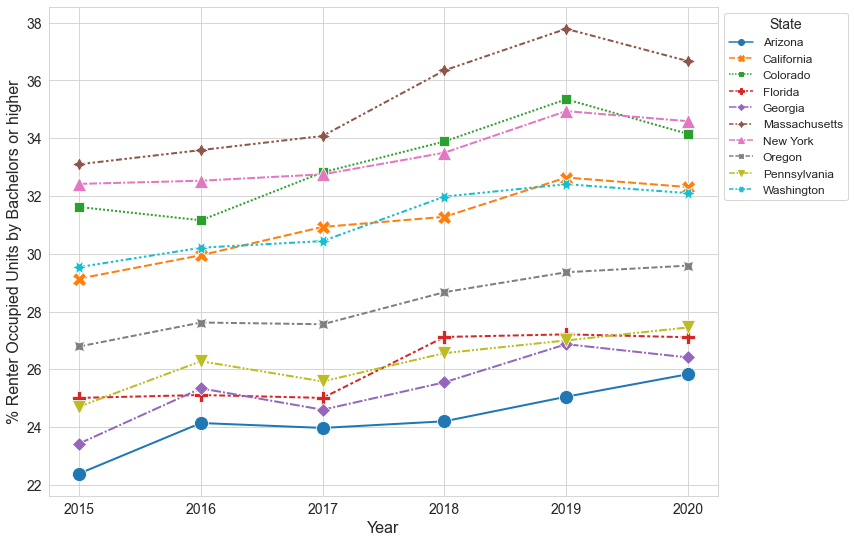

In [384]:
fig, ax = plt.subplots(figsize=(12, 9))
g = sns.lineplot(data=perc_renter_unit_occupied_by_bacherlor_or_higher, 
                 ax=ax, markers=True, markersize=14, lw=2)
ax.set_ylabel("% Renter Occupied Units by Bachelors or higher", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc=2, bbox_to_anchor= (1,1),
           title="State", fontsize=12, title_fontsize=14)
plt.show()


## Takeaways:
From there, we can say:
- From 2015 to 2020, bachelor's or above has rented between 22% to 35% of the rental housing market in the selected states.
- Arizona, Pennsylvania, and Oregon had around 2%-increment in houses rented by bachelors or above between 2019 and 2020. In contrast, it was about a 1%-decrease in the same period in Massachusetts and Colorado.
- For the rest of the states, the rental rate is slowing down.

## Analyzing the income of bachelors or above 
In this section, the features related to income and gross rent cost are analyzed focusing on professional householders. 

In [385]:
query = ("SELECT uspop.year, uspop.name_state, "
         " uspop.median_earnings_bachelor, "
         " uspop.median_earnings_master_or_above, "
         " uspop.median_gross_rent "
         " FROM us_population AS uspop "
         " WHERE uspop.id_state IN ( SELECT state "
         " FROM state_region "
         " WHERE abbreviation IN ('" + "', '".join(list_states) + "'))")

In [386]:
cursor = connectheroku.connect_database("c1_capstone", credential_file)
earning_df = make_query(query, cursor)

In [387]:
earning_df.head()

,year,name_state,median_earnings_bachelor,median_earnings_master_or_above,median_gross_rent
0,2015,New York,55360,71684,1173
1,2015,Oregon,44049,61139,943
2,2015,Pennsylvania,50791,66931,868
3,2015,Washington,55795,71123,1080
4,2015,Arizona,49801,60884,933


In [388]:
earning_df.rename({
    "year": "Year",
    "name_state": "State name",
    "median_earnings_bachelor": "Bachelor earning",
    "median_earnings_master_or_above": "Master or above earning",
    "median_gross_rent": "Gross rent"
}, axis=1, inplace=True)

In [389]:
def max_rent(value, tax_perc=37, ratio=3):
    return np.round(value * (100 - tax_perc) / 12 / ratio / 100, 2)

In [390]:
# Some calculations
tax_percentage = 37
ratio_rent_income = 3
earning_df["Perc diff"] = (((earning_df["Master or above earning"] - 
                           earning_df["Bachelor earning"]) / earning_df["Bachelor earning"] * 100).round(2))

earning_df["Max rent Bachelor"] = earning_df["Bachelor earning"].apply(lambda x: max_rent(x,tax_percentage, ratio_rent_income))
earning_df["Max rent Master"] = earning_df["Master or above earning"].apply(lambda x: max_rent(x,tax_percentage, ratio_rent_income))

#earning_df = earning_df[["year", "name_state", "median_earnings_bachelor", "max expected rent cost bachelor",
#                         "median_earnings_master_or_above", "max expected rent cost master",
#                         "Perc diff", "median_gross_rent"]]

In [391]:
earning_df.head(10)

,Year,State name,Bachelor earning,Master or above earning,Gross rent,Perc diff,Max rent Bachelor,Max rent Master
0,2015,New York,55360,71684,1173,29.49,968.80,1254.47
1,2015,Oregon,44049,61139,943,38.80,770.86,1069.93
2,2015,Pennsylvania,50791,66931,868,31.78,888.84,1171.29
3,2015,Washington,55795,71123,1080,27.47,976.41,1244.65
4,2015,Arizona,49801,60884,933,22.25,871.52,1065.47
5,2015,California,57282,80442,1311,40.43,1002.44,1407.74
6,2015,Colorado,50196,63270,1111,26.05,878.43,1107.22
7,2015,Florida,42714,57128,1046,33.75,747.50,999.74
8,2015,Georgia,49696,61443,909,23.64,869.68,1075.25
9,2015,Massachusetts,57285,74405,1164,29.89,1002.49,1302.09


How much a master professional earns over a bachelor one?

In [392]:
pd.pivot_table(data=earning_df,
               index="State name", 
               columns="Year", 
               values="Perc diff",
               margins=True).round(2)

Year,2015,2016,2017,2018,2019,2020,All
State name,,,,,,,
Arizona,22.25,22.89,28.08,27.97,34.23,29.07,27.42
California,40.43,36.84,40.39,44.68,41.88,41.93,41.02
Colorado,26.05,28.40,29.73,24.11,22.99,28.08,26.56
Florida,33.75,32.30,33.53,33.13,30.57,31.32,32.43
Georgia,23.64,23.27,26.13,23.19,30.50,27.31,25.67
Massachusetts,29.89,27.22,28.67,31.08,31.12,29.47,29.58
New York,29.49,29.25,24.96,27.03,29.25,28.61,28.10
Oregon,38.80,36.06,32.56,34.20,34.97,33.29,34.98
Pennsylvania,31.78,36.12,34.90,35.20,33.40,33.69,34.18


A Master's degree holder earns an average of 30% more than a bachelor graduate in the last 6 years. In California, a master graduate earns 40% over a bachelor professional, while in Georgia is only 25% more.

How much the gross rent has change over time?

In [393]:
pd.pivot_table(data=earning_df,
               index="State name",
               columns="Year",
               values="Gross rent",
               margins=True).round(2)

Year,2015,2016,2017,2018,2019,2020,All
State name,,,,,,,
Arizona,933.0,976.0,1020.0,1036.0,1101.0,1097.0,1027.17
California,1311.0,1375.0,1447.0,1520.0,1614.0,1586.0,1475.50
Colorado,1111.0,1171.0,1240.0,1289.0,1369.0,1335.0,1252.50
Florida,1046.0,1086.0,1128.0,1182.0,1238.0,1218.0,1149.67
Georgia,909.0,933.0,958.0,1008.0,1049.0,1042.0,983.17
Massachusetts,1164.0,1179.0,1208.0,1295.0,1360.0,1336.0,1257.00
New York,1173.0,1194.0,1226.0,1274.0,1309.0,1315.0,1248.50
Oregon,943.0,1015.0,1079.0,1130.0,1185.0,1173.0,1087.50
Pennsylvania,868.0,881.0,893.0,927.0,951.0,958.0,913.00


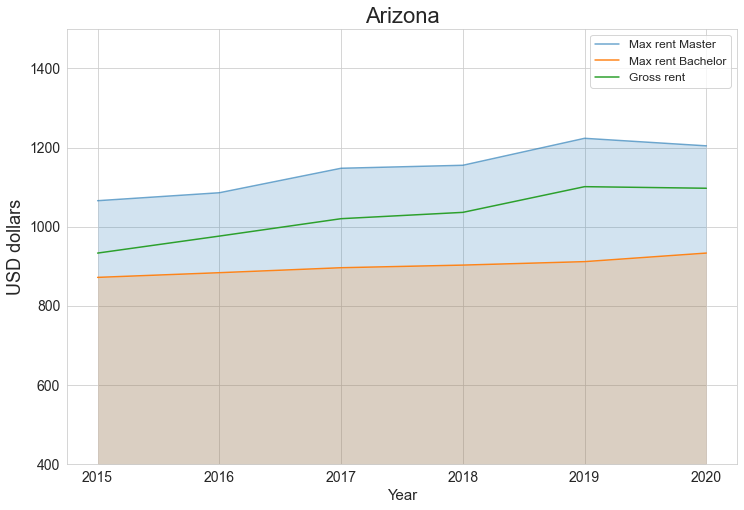

In [394]:
subdata = earning_df[earning_df["State name"]=="Arizona"]
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot("Year", "Max rent Master", data=subdata, alpha=0.65)
ax.fill_between("Year", 'Max rent Master', alpha=0.2, data=subdata)

ax.plot("Year", "Max rent Bachelor",
        data=subdata,
        alpha=0.95)
ax.fill_between("Year", 'Max rent Bachelor', alpha=0.2, data=subdata)

ax.plot("Year", "Gross rent", data=subdata)
ax.set_ylim([400, 1500])
ax.legend(loc='upper left')
ax.set_title('Arizona', fontsize = 22)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('USD dollars', fontsize=18)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [395]:
# Let's do it for all states

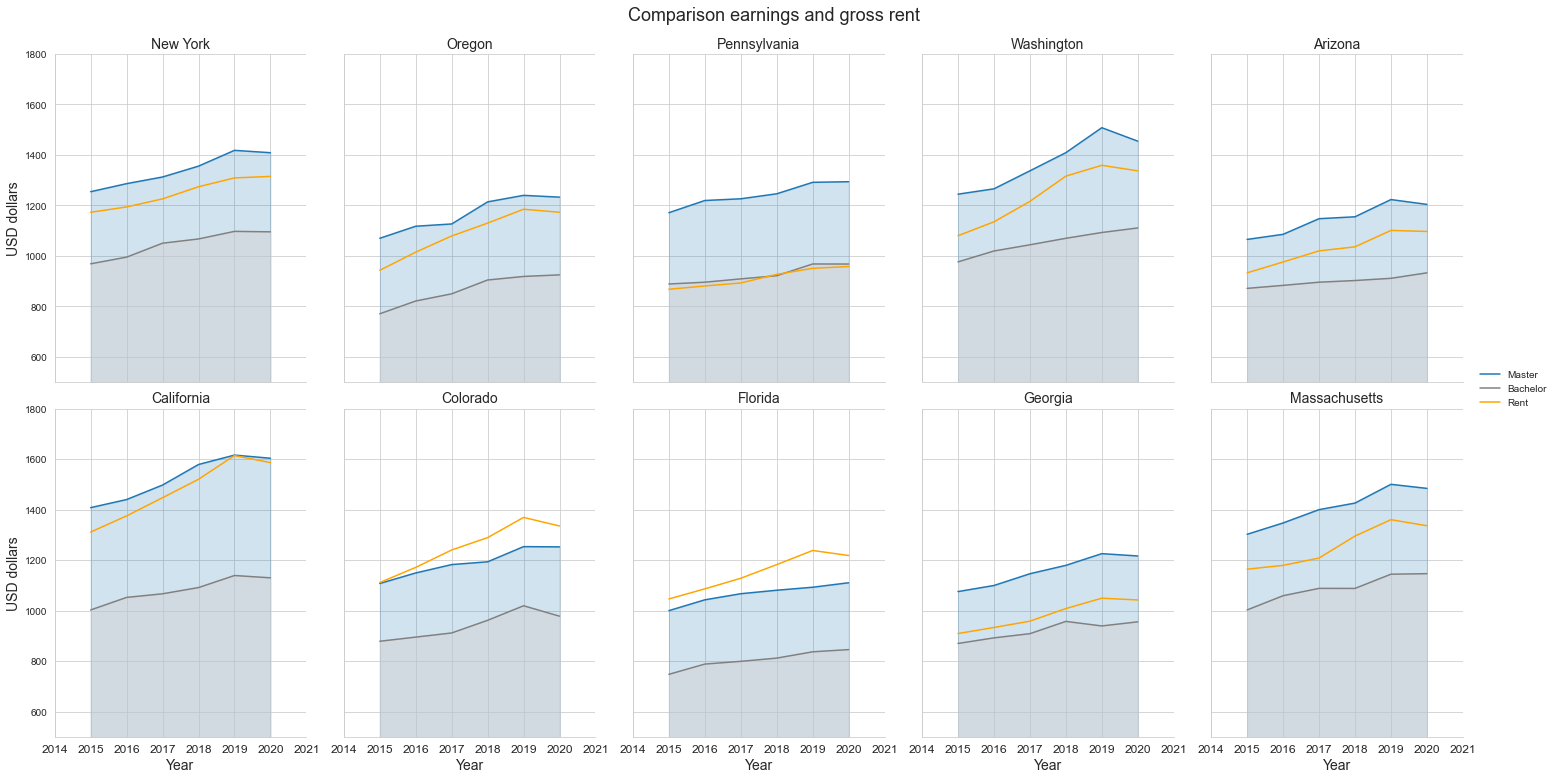

In [396]:
g = sns.FacetGrid(earning_df, col='State name', col_wrap=5, height=5.5, aspect=0.75,ylim=(500, 1800))
g = g.map(plt.plot, 'Year', 'Max rent Master', label="Master")
g = g.map(plt.plot, 'Year', 'Max rent Bachelor', color='gray', label="Bachelor")
g = g.map(plt.plot, 'Year', 'Gross rent', color='orange', label="Rent") 
g = g.map(plt.fill_between, 'Year', 'Max rent Master', alpha=0.2)
g = g.map(plt.fill_between, 'Year', 'Max rent Bachelor', color='lightgray', alpha=0.5)
g = g.set_ylabels("USD dollars", fontsize=14)
g = g.set_xlabels("Year", fontsize=14)
g = g.set_titles("{col_name}", size=14)
g = g.set_xticklabels(fontsize=12)
g.tight_layout()
g.add_legend()
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Comparison earnings and gross rent', fontsize=18)
plt.savefig('earning_rent.png')
# Show the graph
plt.show()

This figure is fascinating. It is shown that the median income for a bachelor's graduate is not enough to rent a house in none of the selected US-States. Florida is the only state where a bachelor's graduate roughly can afford the median gross rental cost. 

In contrast, a master's graduate should be able to afford the median gross rent in all the states except Colorado and Florida. 

Another thing is the gross rent cost has been increasing steadily in all States. California shows a 25%-increment percentage around %25, which is the higher observed among the selected States. On the other hand, the gross rent cost showed a slight decrease between 2019 and 2020

## What is the maximum rent increase a master graduate could be tolerated?

Assuming the rent cost and median earning for master graduated kept constant. What it would be the maximum rental cost increase that can be afford for that population sector?

In [397]:
def able_to_pay(gross_rent, max_rent):
    if max_rent >= gross_rent:
        max_increase = round((max_rent/gross_rent - 1) * 100, 2)
    else:
        max_increase = 0
    return max_increase
    

In [398]:
subdata = earning_df.copy()

In [399]:
subdata.set_index(["Year", "State name"], inplace=True)

In [400]:
subdata

Bachelor earning  Master or above earning  Gross rent  \
Year State name                                                             
2015 New York                  55360                    71684        1173   
     Oregon                    44049                    61139         943   
     Pennsylvania              50791                    66931         868   
     Washington                55795                    71123        1080   
     Arizona                   49801                    60884         933   
     California                57282                    80442        1311   
     Colorado                  50196                    63270        1111   
     Florida                   42714                    57128        1046   
     Georgia                   49696                    61443         909   
     Massachusetts             57285                    74405        1164   
2016 New York                  56868                    73504        1194   
     Oregon                    46942                    63868        1015   
     Pennsylvania              51199                    69691         881   
     Washington                58262                    72335        1135   
     Arizona                   50479                    62034         976   
     California                60121                    82271        1375   
     Colorado                  51136                    65657        1171   
     Florida                   45031                    59576        1086   
     Georgia                   50962                    62819         933   
     Massachusetts             60503                    76972        1179   
2017 New York                  60027                    75012        1226   
     Oregon                    48567                    64380        1079   
     Pennsylvania              51950                    70080         893   
     Washington                59662                    76407        1216   
     Arizona                   51197                    65573        1020   
     California                60940                    85555        1447   
     Colorado                  52074                    67553        1240   
     Florida                   45651                    60959        1128   
     Georgia                   51915                    65479         958   
     Massachusetts             62167                    79988        1208   
2018 New York                  60985                    77469        1274   
     Oregon                    51699                    69381        1130   
     Pennsylvania              52668                    71209         927   
     Washington                61135                    80520        1316   
     Arizona                   51576                    66004        1036   
     California                62347                    90204        1520   
     Colorado                  54937                    68181        1289   
     Florida                   46380                    61748        1182   
     Georgia                   54692                    67375        1008   
     Massachusetts             62154                    81469        1295   
2019 New York                  62699                    81041        1309   
     Oregon                    52498                    70854        1185   
     Pennsylvania              55326                    73805         951   
     Washington                62447                    86167        1359   
     Georgia                   53662                    70027        1049   
     Massachusetts             65373                    85717        1360   
     Florida                   47810                    62425        1238   
     Arizona                   52077                    69902        1101   
     California                65078                    92334        1614   
     Colorado                  58229                    71616        1369   
2020 Pennsylvani

In [401]:
subdata2020 = subdata.loc[(2020, slice(None))]

In [402]:
subdata2020.reset_index(inplace=True)

In [403]:
subdata2020 = subdata2020.drop(["Bachelor earning", "Perc diff", "Max rent Bachelor"], axis=1)

In [404]:
subdata2020["Max increase Master"] = subdata2020[["Gross rent", "Max rent Master"]].apply(lambda x:able_to_pay(*x), axis=1)

In [405]:
subdata2020

,State name,Master or above earning,Gross rent,Max rent Master,Max increase Master
0,Pennsylvania,73943,958,1294.00,35.07
1,California,91622,1586,1603.38,1.10
2,New York,80506,1315,1408.86,7.14
3,Florida,63440,1218,1110.20,0.00
4,Georgia,69501,1042,1216.27,16.72
5,Oregon,70453,1173,1232.93,5.11
6,Arizona,68813,1097,1204.23,9.77
7,Massachusetts,84800,1336,1484.00,11.08
8,Colorado,71561,1335,1252.32,0.00
9,Washington,83120,1337,1454.60,8.80


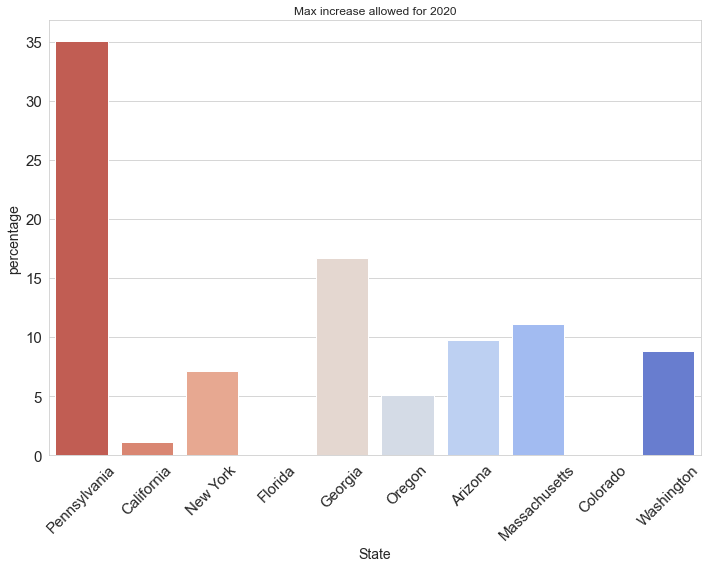

In [406]:
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.barplot(y="Max increase Master", x="State name", data=subdata2020,
                    palette="coolwarm_r", ax=ax)
g.set_ylabel("percentage", fontsize=14)
g.set_xlabel("State", fontsize=14)
g.set_title("Max increase allowed for 2020")
g.tick_params(axis='both', which='major', labelsize=15)
g.tick_params(axis="x", labelrotation=45)
plt.tight_layout()
plt.show()